In [173]:
import numpy as np
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

> Loading Fashion_mnist Dataset

In [174]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

>Split to train and test

>>Normalizing data



In [175]:
X_train = train_X[:1000, :, :].reshape(1000,784) / 255
Y_train = train_Y[:1000]
X_test = train_X[1000:4000, :, :].reshape(3000,784) / 255
Y_test = train_Y[1000:4000]

> Part 1
>>Define SOM  Function

In [286]:

def SOM(X_train, R, learning_rate,learning_rate_decay, num_epochs):

  Weight_stored = np.zeros((num_epochs,420,420))
  chosen = np.zeros((225,1))
  position_min = np.zeros((len(X_train)))
  P = 0

  for epoch in range(num_epochs):
    for i in range(len(X_train)):
      D = np.zeros((15,15))
      for j in range(len(D)):
        for k in range(len(D)):
          D[j,k] = np.matmul(((X_train[i,:] - W[:,j,k]).reshape(784,1)).T,
                              ((X_train[i,:] - W[:,j,k]).reshape(784,1)))
      
      min_row, min_col = np.where(D==np.amin(D))
      position_min[i] =  15 * min_row + min_col
      
      if epoch==num_epochs-1:
        chosen[15 * min_row + min_col] = chosen[15 * min_row + min_col] + 1
      for l in range(-R,R+1):
          for b in range(-R,R+1):
            if min_row[0] + l <= 14 and min_row[0] + l>=0 and min_col[0] + b>=0 and min_col[0] + b <= 14:
              W[:,min_row[0]+ l,min_col[0]+ b] = W[:,min_row[0] + l, min_col[0]+ b] + learning_rate * (X_train[i,:] - W[:,min_row[0]+ l, min_col[0]+ b])
    learning_rate=learning_rate * learning_rate_decay
    
    if(epoch % 5 == 0):
        for s in range(15):
              for t in range(15):
                Weight_stored[P, 28 * s : 28 * (s + 1), 28 * t : 28 * (t + 1)] = W[:, s, t].reshape(28,28)
        P=P+1
        
  return Weight_stored, position_min, chosen, P

>Initializing Weights

In [287]:
W =np.random.random((784,15,15))

> Call Function

In [288]:
learning_rate = 0.8
learning_rate_decay = 0.8
R = 1
num_epochs = 20

Weight_stored, position_min, chosen, P = SOM(X_train, R, learning_rate, learning_rate_decay, num_epochs)

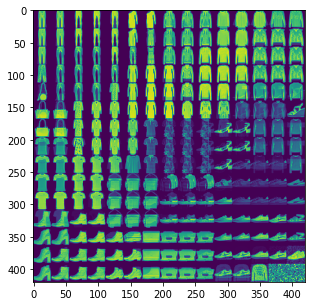

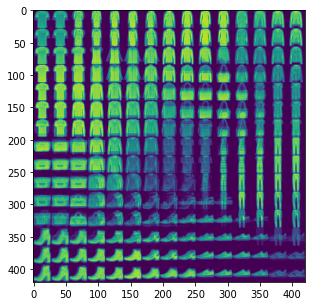

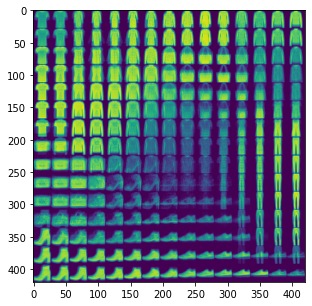

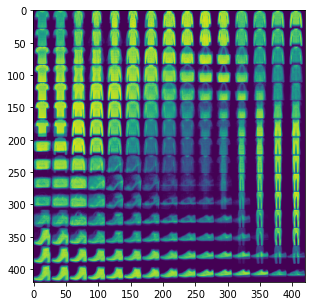

In [289]:
for i in range(P):
  plt.figure(i,figsize=(5,5))
  plt.imshow(Weight_stored[i])

>Optional Part 1

In [290]:
Cluster = np.zeros((10,225))
n_clusters = np.zeros((255,1))
for i in range(1000):
  Cluster[Y_train[i],int(position_min[i])] = neuron_class[Y_train[i],
                                                          int(position_min[i])] +1
for j in range(225):
  for i in range(10):
    if Cluster[i,j] != 0 :
       n_clusters[j] = n_clusters[j]+1

>>Number of inputs that maped to each neuron

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


<StemContainer object of 3 artists>

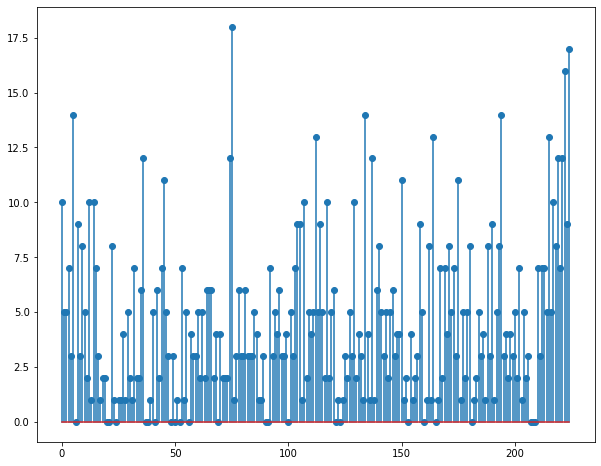

In [291]:
plt.figure(figsize=(10,8))
plt.stem(chosen)

>>Number of unique classes that maped to each neuron

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


<StemContainer object of 3 artists>

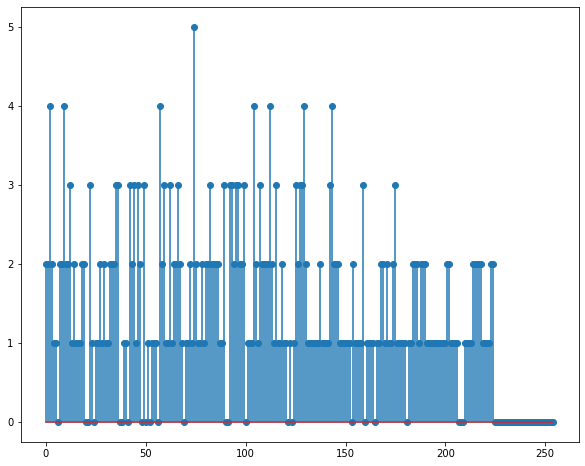

In [292]:
plt.figure(figsize=(10,8))
plt.stem(n_clusters)

>Optional Part 2

In [293]:
W =np.random.random((784,15,15))
learning_rate = 0.8
learning_rate_decay = 0.8
R = 0
num_epochs = 20

Weight_stored, position_min, chosen, P = SOM(X_train, R, learning_rate, learning_rate_decay, num_epochs)

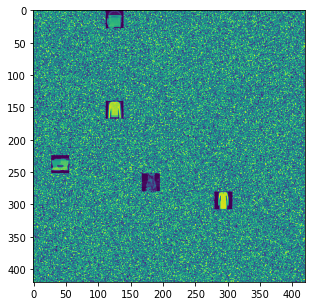

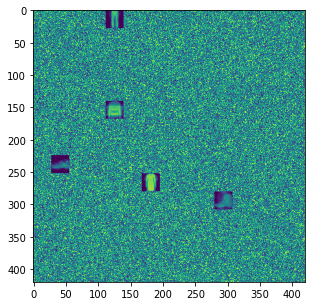

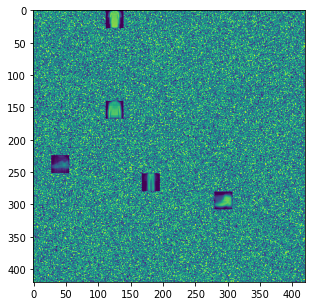

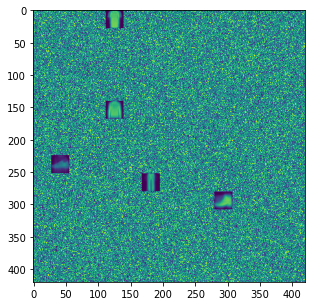

In [294]:
for i in range(P):
  plt.figure(i,figsize=(5,5))
  plt.imshow(Weight_stored[i])

>Part 3
>>Define SOM_Modify  Function

In [317]:
def SOM_Modify(X_train, R, learning_rate, learning_rate_decay, num_epochs):

  Weight_stored = np.zeros((num_epochs,420,420))
  chosen = np.zeros((225,1))
  position_min = np.zeros((len(X_train)))
  P = 0

  for epoch in range(num_epochs):
    for i in range(len(X_train)):
      D = np.zeros((15,15))
      for j in range(len(D)):
        for k in range(len(D)):
          D[j,k] = np.matmul(((X_train[i,:] - W[:,j,k]).reshape(784,1)).T,
                              ((X_train[i,:] - W[:,j,k]).reshape(784,1)))
      
      min_row, min_col = np.where(D==np.amin(D))
      position_min[i] =  15 * min_row + min_col
      
      if epoch==num_epochs-1:
        chosen[15 * min_row + min_col] = chosen[15 * min_row + min_col] + 1
      for l in range(-R,R+1):
          for b in range(-R,R+1):
            if min_row[0] + l <= 14 and min_row[0] + l>=0 and min_col[0] + b>=0 and min_col[0] + b <= 14:
              W[:,min_row[0]+ l,min_col[0]+ b] = W[:,min_row[0] + l, min_col[0]+ b] + learning_rate * (X_train[i,:] - W[:,min_row[0]+ l, min_col[0]+ b])
    learning_rate=learning_rate * learning_rate_decay
    
    if(epoch % 5 == 0):
        for s in range(15):
              for t in range(15):
                Weight_stored[P, 28 * s : 28 * (s + 1), 28 * t : 28 * (t + 1)] = W[:, s, t].reshape(28,28)
        P = P + 1
    if(R>0):
       R= R-1  
    else:
      R=0
  return Weight_stored, position_min, chosen, P

In [362]:
W =np.random.random((784,15,15))
learning_rate = 0.8
learning_rate_decay = 0.8
R = 3
num_epochs = 20

Weight_stored, position_min, chosen, P = SOM_Modify(X_train, R, learning_rate, learning_rate_decay, num_epochs)

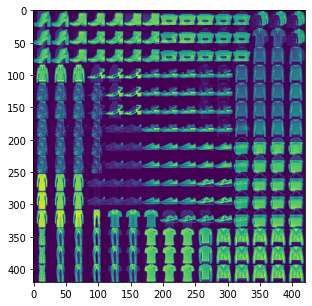

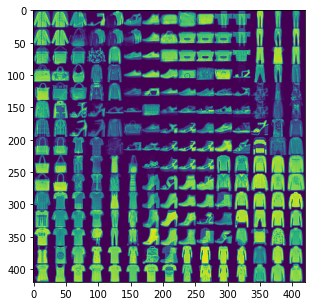

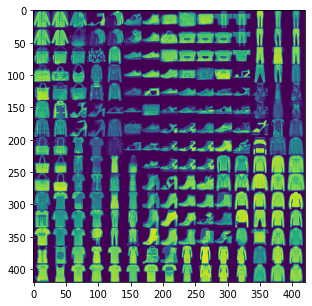

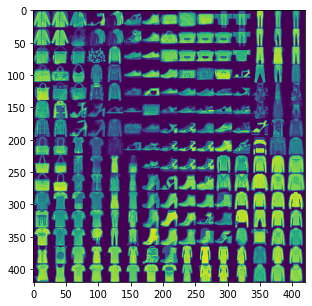

In [363]:
for i in range(P):
  plt.figure(i,figsize=(5,5))
  plt.imshow(Weight_stored[i])

>Optional Part 3

In [364]:
Cluster = np.zeros((10,225))
n_clusters = np.zeros((255,1))
for i in range(1000):
  Cluster[Y_train[i],int(position_min[i])] = neuron_class[Y_train[i],
                                                          int(position_min[i])] +1
for j in range(225):
  for i in range(10):
    if Cluster[i,j] != 0 :
       n_clusters[j] = n_clusters[j]+1

>>Number of inputs that maped to each neuron

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


<StemContainer object of 3 artists>

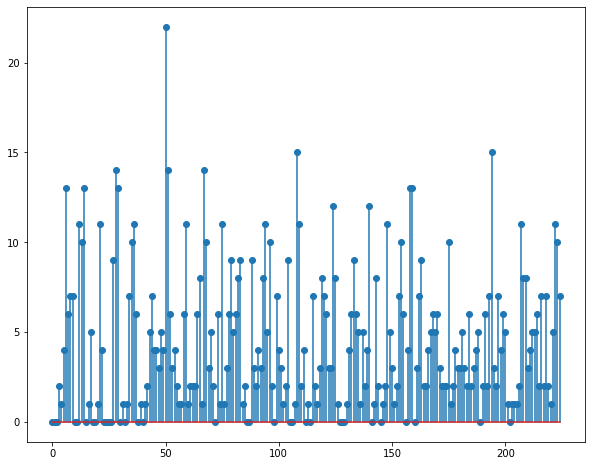

In [365]:
plt.figure(figsize=(10,8))
plt.stem(chosen)

>>Number of unique classes that maped to each neuron

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


<StemContainer object of 3 artists>

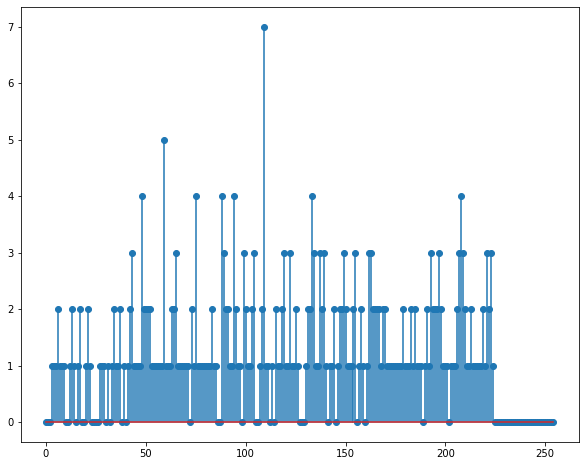

In [366]:
plt.figure(figsize=(10,8))
plt.stem(n_clusters)

In [377]:
np.shape(np.where(n_clusters>1))[1]

80